Written by Paweł Wolny

### Reading the data 

First we have to read our car sales data from the CSV file into a Pandas dataframe.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt


# This line requires the car sales data to be located in a folder called data in the same directory as the notebook
car_data = pd.read_csv("./data/car_sales.csv", low_memory=False)

Now, let's take a first look at how our data looks like.

In [2]:
car_data.head()

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Price,Seat_num,Door_num
0,Bentley,Arnage,10_1,10_1$$1,2018,4,Silver,2000.0,Saloon,60000,6.8L,Automatic,Petrol,21500,5.0,4.0
1,Bentley,Arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000,6.8L,Automatic,Petrol,28750,5.0,4.0
2,Bentley,Arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000,6.8L,Automatic,Petrol,29999,5.0,4.0
3,Bentley,Arnage,10_1,10_1$$4,2018,4,Green,2003.0,Saloon,14000,6.8L,Automatic,Petrol,34948,5.0,4.0
4,Bentley,Arnage,10_1,10_1$$5,2017,11,Grey,2003.0,Saloon,61652,6.8L,Automatic,Petrol,26555,5.0,4.0


### Initial cleanup and analysis of the data

For covenience, we will set all of the column names to lowercase.

In [3]:
car_data.columns = car_data.columns.str.lower()

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   maker         268255 non-null  object 
 1   genmodel      268255 non-null  object 
 2   genmodel_id   268255 non-null  object 
 3   adv_id        268255 non-null  object 
 4   adv_year      268255 non-null  int64  
 5   adv_month     268255 non-null  int64  
 6   color         246380 non-null  object 
 7   reg_year      268248 non-null  float64
 8   bodytype      267301 non-null  object 
 9   runned_miles  267200 non-null  object 
 10  engin_size    266191 non-null  object 
 11  gearbox       268088 non-null  object 
 12  fuel_type     267846 non-null  object 
 13  price         268255 non-null  object 
 14  seat_num      261781 non-null  float64
 15  door_num      263702 non-null  float64
dtypes: float64(3), int64(2), object(11)
memory usage: 32.7+ MB


In [5]:
car_data.shape

(268255, 16)

From the above we can see that our dataset consists of 16 columns and 268255 rows. Furthermore, we can see that we have 11 attributes of type *object*, 3 attributes of type *float64*, and 2 attributes of type *int64*. Straightaway we can drop columns **genmodel_id**, **adv_id**.

In [6]:
car_data = car_data.drop(columns=["genmodel_id", "adv_id"])

In a few cases, it seems that there has been a conversion issue while reading from the CSV file, as attributes such as **price** and **runned_miles** should be of numerical type instead of type *object*. Also, the *engine_size* attribute should be of numerical type, however in this case the automatic conversion to *object* type is due to the letter "L" appending the engine size in liters. We will fix these issues now. <br><br>

First let's remove the appending "L" from the **engin_size** column and convert it to a float.

In [7]:
car_data["engin_size"] = car_data["engin_size"].str.rstrip('L').astype(float)

Now let's take care of the two other issues. After taking a closer look at the values in the **price** column, we can see that there are entries with value of "Uknown". This is the reason why the automatic conversion did not work. We will fix it now.

In [8]:
car_data["price"] = pd.to_numeric(car_data["price"], errors='coerce')

The **runned_miles** column seems to have empty entries, hence to fix it we will repeat the same procedure as above:

In [9]:
car_data["runned_miles"] = pd.to_numeric(car_data["runned_miles"], errors='coerce')

Let's now examine the summary of our dataset again.

In [10]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   maker         268255 non-null  object 
 1   genmodel      268255 non-null  object 
 2   adv_year      268255 non-null  int64  
 3   adv_month     268255 non-null  int64  
 4   color         246380 non-null  object 
 5   reg_year      268248 non-null  float64
 6   bodytype      267301 non-null  object 
 7   runned_miles  266942 non-null  float64
 8   engin_size    266191 non-null  float64
 9   gearbox       268088 non-null  object 
 10  fuel_type     267846 non-null  object 
 11  price         267110 non-null  float64
 12  seat_num      261781 non-null  float64
 13  door_num      263702 non-null  float64
dtypes: float64(6), int64(2), object(6)
memory usage: 28.7+ MB


Now all the attributes that are numerical have a numerical data type. <br><br>

As a next step, let's examine the null values in each column.

In [11]:
car_data.isnull().sum()

maker               0
genmodel            0
adv_year            0
adv_month           0
color           21875
reg_year            7
bodytype          954
runned_miles     1313
engin_size       2064
gearbox           167
fuel_type         409
price            1145
seat_num         6474
door_num         4553
dtype: int64

We can see that a majority of attributes has missing values. We will have to take care of it later. <br><br>

Last but not least let's examine a summary of the numerical attributes.

In [12]:
car_data.describe()

,adv_year,adv_month,reg_year,runned_miles,engin_size,price,seat_num,door_num
count,268255.000000,268255.000000,268248.000000,2.669420e+05,266191.000000,2.671100e+05,261781.000000,263702.000000
mean,2018.127778,5.626143,2012.708430,4.816993e+04,1.963554,1.475626e+04,4.904306,4.371594
std,0.747476,2.091577,4.465705,4.184823e+04,9.362173,3.232091e+04,0.877934,1.009339
min,2012.000000,1.000000,1900.000000,0.000000e+00,0.100000,1.000000e+02,1.000000,0.000000
25%,2018.000000,4.000000,2010.000000,1.416000e+04,1.400000,4.990000e+03,5.000000,4.000000
50%,2018.000000,5.000000,2014.000000,3.929650e+04,1.800000,9.299000e+03,5.000000,5.000000
75%,2018.000000,7.000000,2016.000000,7.500000e+04,2.000000,1.715000e+04,5.000000,5.000000
max,2021.000000,33.000000,2019.000000,6.363342e+06,3500.000000,9.999999e+06,17.000000,7.000000


### Removing the outliers
Now let's do some visualisations of our dataset to gain more insights into our data. We are going to start with a boxplot for all numerical attributes of our dataset.

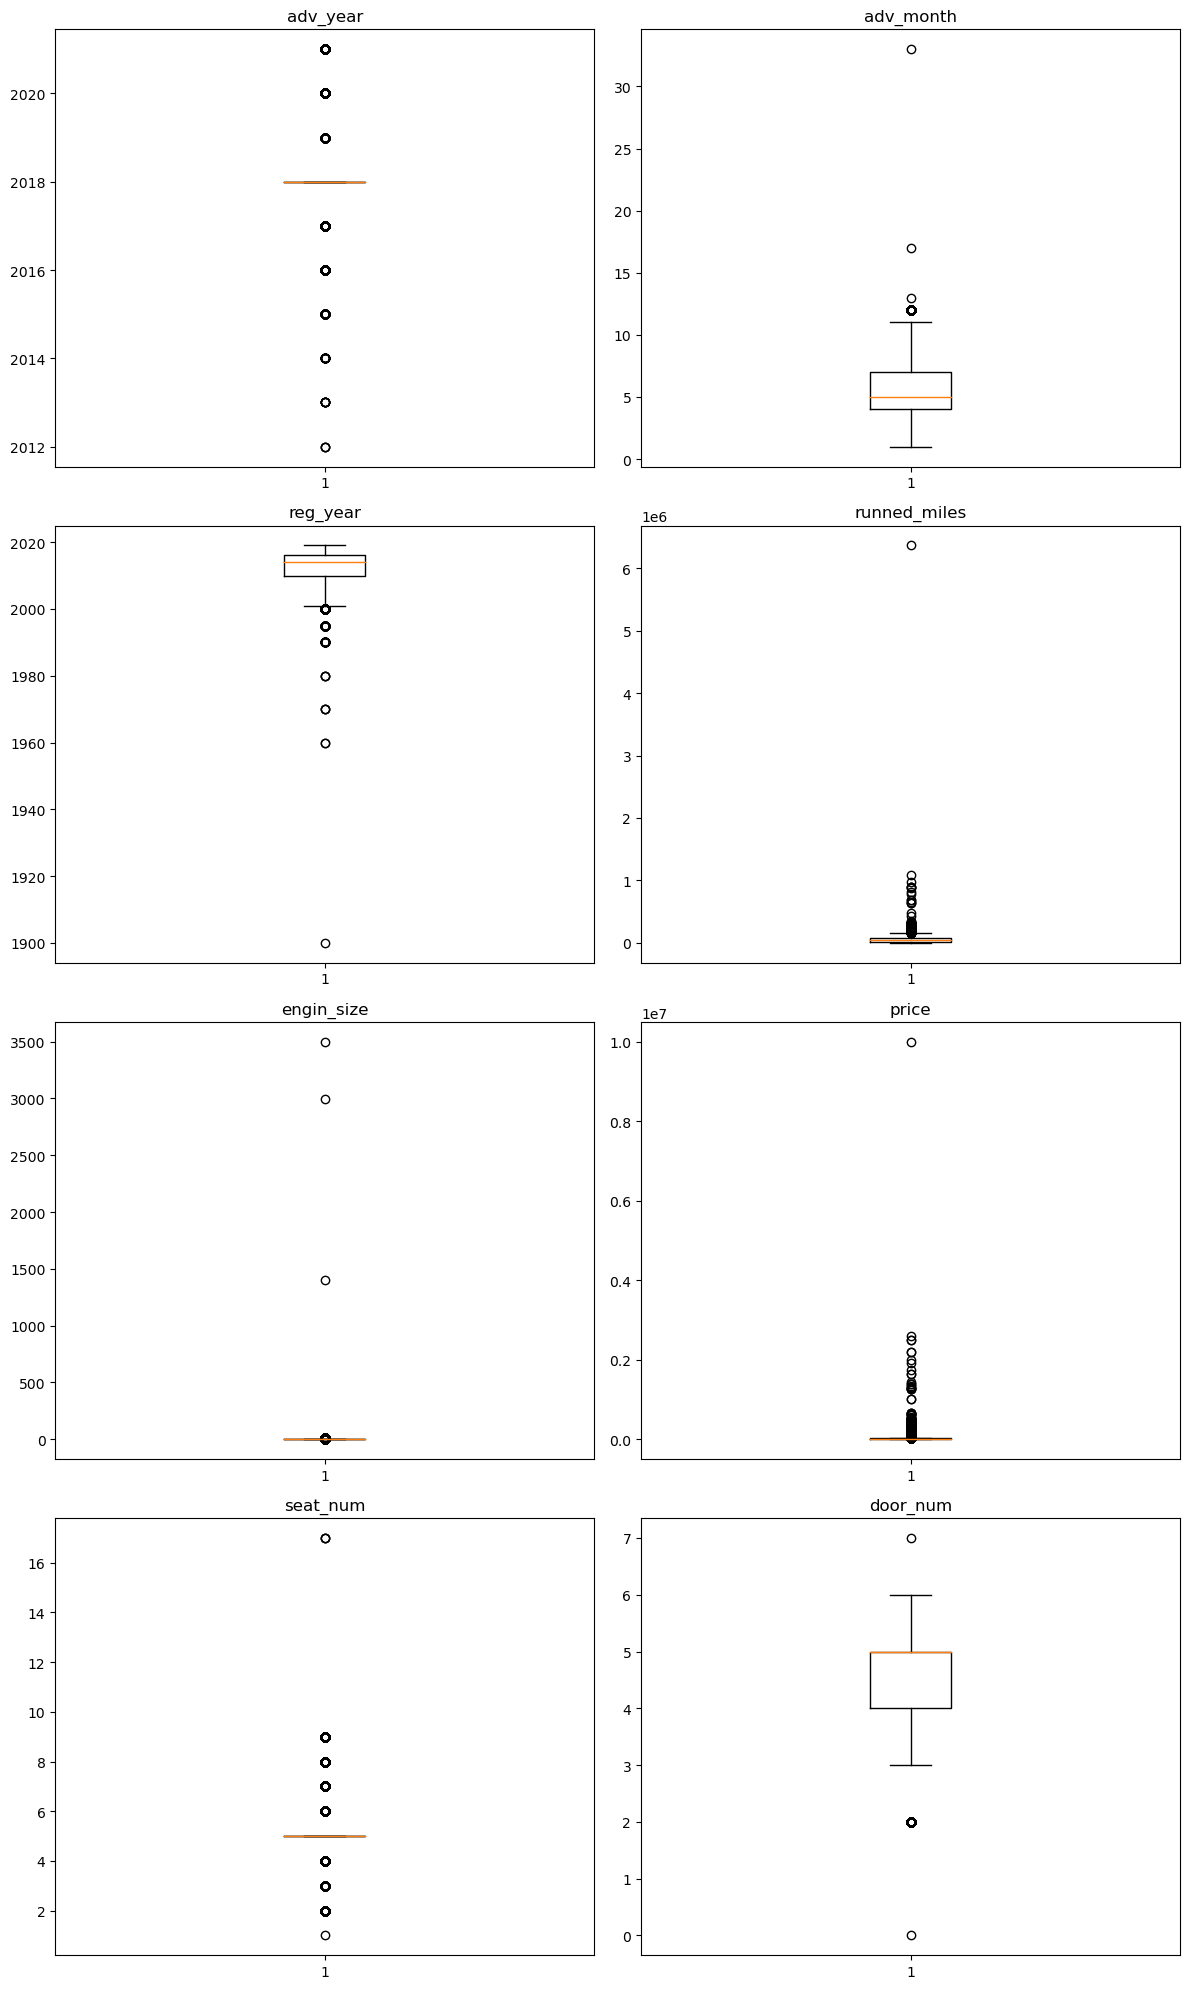

In [13]:
numerical_columns = car_data.select_dtypes(include=['float64', 'int64'])

num_columns = len(numerical_columns.columns)
num_rows = (num_columns // 2) + (num_columns % 2)

plt.figure(figsize=(12, 5 * num_rows))

for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(num_rows, 2, i)
    plt.boxplot(car_data[column].dropna())
    plt.title(column)

plt.tight_layout()
plt.show()

Looking at the figures above, we can already see that we have some odd-looking outliers in **adv_month**, **price**, **engine_size**, and **seat_num**. As for the first three attributes they are definietly outliers as the numbers just don't make sense, the last one actually does not have any outliers. It turns out that the 17 seats belong to the Mercedes Sprinter Minibus so we are good with this one. However, we have to take care of the other outliers.

Let's start with **adv_month**. We will check how many values exceeding 12 do we actually have.

In [14]:
car_data[car_data["adv_month"] > 12]

,maker,genmodel,adv_year,adv_month,color,reg_year,bodytype,runned_miles,engin_size,gearbox,fuel_type,price,seat_num,door_num
46560,Ford,Streetka,2012,13,Blue,2005.0,Convertible,22000.0,1.6,Manual,Petrol,2999.0,2.0,2.0
135473,Peugeot,407,2012,17,Blue,2006.0,Coupe,77000.0,2.7,Automatic,Diesel,4499.0,4.0,2.0
154764,Rolls-Royce,Phantom,2012,33,Black,2007.0,Saloon,20000.0,6.7,Automatic,Petrol,116065.0,5.0,NaN


For this one it seems reasonable to fill the corrupted **adv_month** values with the most frequent value for that column.

In [15]:
most_frequent_value = car_data["adv_month"].mode().iloc[0]
car_data["adv_month"] = car_data["adv_month"].map(lambda x: most_frequent_value if x > 12 else x)

Now let's take care of the **price** column.

In [16]:
car_data.nlargest(10, "price")

,maker,genmodel,adv_year,adv_month,color,reg_year,bodytype,runned_miles,engin_size,gearbox,fuel_type,price,seat_num,door_num
104958,McLaren,675LT,2017,6,Silver,2016.0,Coupe,200.0,3.8,Automatic,Petrol,9999999.0,2.0,2.0
14460,Ferrari,Laferrari,2018,3,Red,2014.0,Coupe,1824.0,6.3,NaN,NaN,2599990.0,2.0,NaN
14462,Ferrari,Laferrari,2018,4,Red,2014.0,Coupe,1502.0,NaN,NaN,Petrol,2500000.0,2.0,NaN
105002,McLaren,P1,2021,4,Yellow,2019.0,Coupe,600.0,3.8,Automatic,Petrol Plug-in Hybrid,2490000.0,2.0,2.0
14276,Ferrari,Enzo,2018,3,Red,2004.0,Coupe,7620.0,6.0,NaN,Petrol,2200000.0,2.0,NaN
14461,Ferrari,Laferrari,2017,10,Red,2013.0,Coupe,5800.0,6.3,Automatic,NaN,2195000.0,2.0,NaN
14275,Ferrari,Enzo,2017,10,Red,2003.0,Coupe,4397.0,6.0,NaN,Petrol,2000000.0,2.0,NaN
104999,McLaren,P1,2017,2,Yellow,2016.0,Coupe,151.0,3.8,Automatic,Hybrid Petrol/Electric Plug-in,1920000.0,2.0,2.0
105000,McLaren,P1,2018,4,Orange,2016.0,Coupe,NaN,3.8,Automatic,Petrol,1750000.0,NaN,NaN
1109,Bugatti,Veyron,2018,5,Black,2007.0,Coupe,828.0,8.0,Automatic,Petrol,1650000.0,2.0,NaN


It is highly unlikely that a McLaren 675LT would cost almost 10000000 pounds. Let's see if we have any other McLarens 675LT soldi in 2017 in our dataset.

In [17]:
car_data[(car_data["genmodel"] == "675LT") & (car_data["adv_year"] == 2017)]

,maker,genmodel,adv_year,adv_month,color,reg_year,bodytype,runned_miles,engin_size,gearbox,fuel_type,price,seat_num,door_num
104946,McLaren,675LT,2017,6,Orange,2016.0,Convertible,193.0,3.8,Automatic,Petrol,299990.0,2.0,2.0
104947,McLaren,675LT,2017,10,Orange,2016.0,Coupe,662.0,3.8,Automatic,Petrol,244950.0,2.0,2.0
104950,McLaren,675LT,2017,9,Orange,2016.0,Coupe,9843.0,3.8,Automatic,Petrol,249000.0,2.0,NaN
104958,McLaren,675LT,2017,6,Silver,2016.0,Coupe,200.0,3.8,Automatic,Petrol,9999999.0,2.0,2.0
104960,McLaren,675LT,2017,7,Grey,2016.0,Convertible,280.0,3.8,Semi-Automatic,Petrol,299950.0,NaN,NaN
104962,McLaren,675LT,2017,9,Green,2016.0,Convertible,10.0,3.8,Automatic,Petrol,309995.0,2.0,NaN
104967,McLaren,675LT,2017,4,White,2015.0,Coupe,30000.0,3.8,Automatic,Petrol,269989.0,2.0,2.0


Since we have a bunch of them, let's fill in our outlier with the median for the 675LTs sold in 2017.

In [18]:
mclaren_price_median = car_data[(car_data["genmodel"] == "675LT") & (car_data["adv_year"] == 2017) & (car_data["price"] < 1000000)]["price"].median()
car_data.at[104958, "price"] = mclaren_price_median

Next we have the **engin_size** column.

In [19]:
car_data.nlargest(10, "engin_size")

,maker,genmodel,adv_year,adv_month,color,reg_year,bodytype,runned_miles,engin_size,gearbox,fuel_type,price,seat_num,door_num
130799,Nissan,Elgrand,2018,7,Black,2004.0,MPV,52000.0,3500.0,Automatic,Petrol,9988.0,8.0,NaN
114114,Mitsubishi,Gto,2018,5,Red,2002.0,Coupe,61000.0,2998.0,Automatic,Petrol,2995.0,4.0,NaN
130712,Nissan,Cubic,2018,5,NaN,2003.0,Estate,71000.0,1400.0,Automatic,Petrol,3000.0,5.0,NaN
194214,Suzuki,Celerio,2018,3,White,2017.0,Hatchback,22058.0,10.0,Manual,Petrol,5499.0,NaN,NaN
146118,Porsche,Cayenne,2018,3,Black,2018.0,Estate,50.0,8.2,NaN,Diesel,64990.0,NaN,NaN
1108,Bugatti,Veyron,2018,4,Multicolour,2007.0,Coupe,5000.0,8.0,Automatic,Petrol,1250000.0,NaN,NaN
1109,Bugatti,Veyron,2018,5,Black,2007.0,Coupe,828.0,8.0,Automatic,Petrol,1650000.0,2.0,NaN
1795,Chevrolet,Corvette,2018,4,Orange,2015.0,Coupe,6600.0,7.0,Manual,Petrol,99995.0,2.0,NaN
78972,Lamborghini,Aventador,2017,12,Orange,2012.0,NaN,18000.0,6.9,Automatic,Petrol,202895.0,2.0,NaN
0,Bentley,Arnage,2018,4,Silver,2000.0,Saloon,60000.0,6.8,Automatic,Petrol,21500.0,5.0,4.0


Looking at the largest values, we can safely assume that there was a mistake made in the units of the engine size values. For the Nissan Elgrand model the value should be 3.5 liters, for Mitsubishi GTO it should be 2.998 liters, for Nissan Cubic it should be 1.4 liters, and for Suzuki Celerio it should be 1.0 liters.

In [20]:
car_data.at[130799, "engin_size"] = 3.5
car_data.at[114114, "engin_size"] = 2.998
car_data.at[130712, "engin_size"] = 1.4
car_data.at[194214, "engin_size"] = 1

Last but not least, we have the **runned_miles** column. Let's take a look at the top 10 largest values.

In [21]:
car_data.nlargest(10, "runned_miles")

,maker,genmodel,adv_year,adv_month,color,reg_year,bodytype,runned_miles,engin_size,gearbox,fuel_type,price,seat_num,door_num
245206,Volkswagen,Golf,2018,4,Black,2007.0,Hatchback,6363342.0,1.6,Manual,Petrol,2395.0,5.0,5.0
57788,Hyundai,Getz,2018,6,Silver,2005.0,Hatchback,1080000.0,1.1,Manual,Petrol,785.0,5.0,3.0
94682,MINI,Convertible,2018,5,Red,2004.0,Convertible,967515.0,1.6,Manual,Petrol,1875.0,4.0,2.0
27899,Ford,Focus,2017,11,NaN,2010.0,Hatchback,900000.0,1.6,Manual,Petrol,1500.0,5.0,5.0
66895,Jaguar,XF,2018,4,Black,2010.0,Saloon,900000.0,3.0,Automatic,Diesel,9100.0,5.0,4.0
230562,Vauxhall,Zafira,2018,8,Beige,2007.0,MPV,889087.0,1.6,Manual,Petrol,500.0,7.0,5.0
15545,Fiat,Grande Punto,2018,5,Black,2006.0,Hatchback,880000.0,1.4,Manual,Petrol,800.0,5.0,3.0
1210,Chevrolet,Lacetti,2018,8,Blue,2008.0,Estate,820000.0,1.8,Automatic,Petrol,325.0,5.0,5.0
7701,Citroen,C2,2018,8,Blue,2004.0,Hatchback,780000.0,1.1,Manual,Petrol,250.0,4.0,3.0
231222,Vauxhall,Zafira,2018,8,Silver,2004.0,MPV,690644.0,2.0,Manual,Diesel,850.0,7.0,5.0


There is no way that the Volkswagen Golf has driven more than 6 million miles in 11 years. Let's take a look at similar models.

In [22]:
len(car_data[(car_data["genmodel"] == "Golf") & (car_data["adv_year"] == 2018)])

2852

We have 2852 models of Volkswagen Golf that have been advertised in 2018. Now, let's get the cars that had a similar price and registration year.

In [23]:
similar_cars = car_data[(car_data["genmodel"] == "Golf") & (car_data["adv_year"] == 2018) & (car_data["price"] > 2300) & (car_data["price"] < 2500) & (car_data["reg_year"] == 2007) & (car_data["door_num"] == 5)]
similar_cars = similar_cars.drop(245206)

Now let's replace the value with the median mileage for this set of cars similar to the Volkswagen Golf under consideration.

In [24]:
car_data.at[245206, "runned_miles"] = similar_cars["runned_miles"].median()

### Visualising the data

Now as we have removed the outliers, we can make use of different visualization techniques to gain more insights about our data. 

First visualisation we can make use of is the scatter matrix, where we will be able to see if there are any promising correlations between the attributes. We will plot only a few of the attributes since plotting all of them would take up way too much space. <br><br>

Before we plot let's first examine the correlation coefficients of different numerical attributes with the price.

In [25]:
corr_matrix = car_data.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price           1.000000
engin_size      0.479720
reg_year        0.290790
adv_year        0.077953
adv_month      -0.032308
seat_num       -0.139872
door_num       -0.141074
runned_miles   -0.302265
Name: price, dtype: float64

It seems like the attributes that are the most correlated with the price are **engin_size**, **reg_year**, **seat_num**, **door_num**, and **runned_miles**.

Now, we can also try to combine **seat_num** and **door_num** because from a logical point of view, we can quite accurately determine the number of doors given the number of seats in a car an vice versa because of the standards in the industry.

In [26]:
car_data["sum_seats_and_doors"] = car_data["seat_num"] + car_data["door_num"]
corr_matrix = car_data.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price                  1.000000
engin_size             0.479720
reg_year               0.290790
adv_year               0.077953
adv_month             -0.032308
seat_num              -0.139872
door_num              -0.141074
sum_seats_and_doors   -0.155768
runned_miles          -0.302265
Name: price, dtype: float64

In [27]:
corr_matrix["seat_num"]

adv_year               0.018763
adv_month             -0.003364
reg_year               0.060249
runned_miles           0.066406
engin_size            -0.065825
price                 -0.139872
seat_num               1.000000
door_num               0.582095
sum_seats_and_doors    0.871459
Name: seat_num, dtype: float64

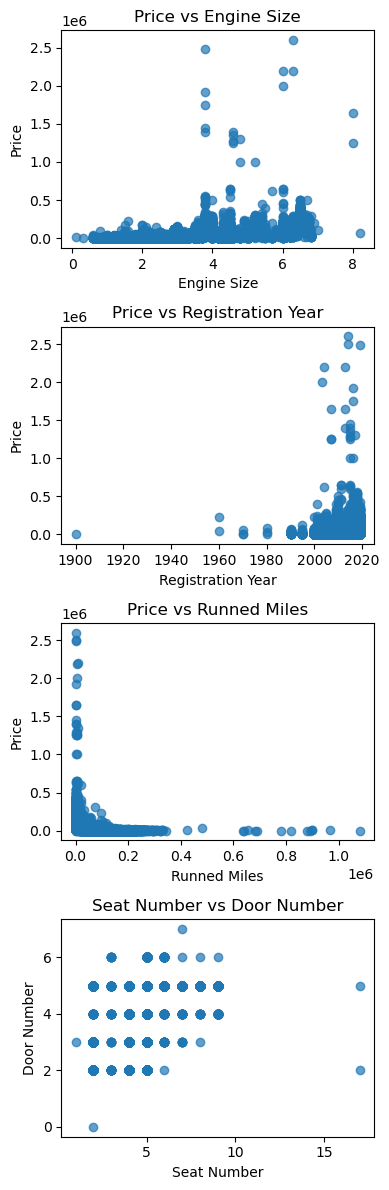

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(4, 12))

axes[0].scatter(car_data["engin_size"], car_data["price"], alpha=0.7)
axes[0].set_xlabel("Engine Size")
axes[0].set_ylabel("Price")
axes[0].set_title("Price vs Engine Size")

axes[1].scatter(car_data["reg_year"], car_data["price"], alpha=0.7)
axes[1].set_xlabel("Registration Year")
axes[1].set_ylabel("Price")
axes[1].set_title("Price vs Registration Year")

axes[2].scatter(car_data["runned_miles"], car_data["price"], alpha=0.7)
axes[2].set_xlabel("Runned Miles")
axes[2].set_ylabel("Price")
axes[2].set_title("Price vs Runned Miles")

axes[3].scatter(car_data["seat_num"], car_data["door_num"], alpha=0.7)
axes[3].set_xlabel("Seat Number")
axes[3].set_ylabel("Door Number")
axes[3].set_title("Seat Number vs Door Number")

plt.tight_layout()

plt.show()

Here we plot a scatter matrix to discover any interesting correlations in our data.

As we can see, the sum of seats and doors seems to have a stronger correlation with the price compared to seat number and door number attributes on their own. Hence, let's remove both **seat_num** and **door_num** and use **sum_seats_and_doors** instead.

In [29]:
car_data = car_data.drop(["seat_num", "door_num"], axis=1)

from pandas.plotting import scatter_matrix
attributes = ["price", "engin_size", "reg_year","runned_miles", "sum_seats_and_doors"]
scatter_matrix(car_data[attributes], alpha=0.8, figsize=(15, 15), diagonal='hist', range_padding=0.1)
plt.suptitle('Scatter Matrix of Numerical Attributes', y=0.92)
plt.show()

From the above, we can deduce that there is a strong positive correlation between price and engine size, which makes a lot of sense as generally cars with bigger engines are more expensive. Also there seems to be a more positive correlation between price and registration year, which is also valid as newer cars are more expensive. When it comes to negative correlations, we can see a that as the mileage increases, the price rapidly drops, which is expected since the more worn out cars will obviously be cheaper.

### Fixing the missing values

Now, we are going to fix the missing values.

In [30]:
car_data.isnull().sum()

maker                      0
genmodel                   0
adv_year                   0
adv_month                  0
color                  21875
reg_year                   7
bodytype                 954
runned_miles            1313
engin_size              2064
gearbox                  167
fuel_type                409
price                   1145
sum_seats_and_doors     8704
dtype: int64

Starting with **price** column, in this case we are going to just remove the entries for which the model is missing. The rows with missing price values make up a very small percentage of our dataset so for simplicity let's just remove them.

In [31]:
car_data = car_data.dropna(subset=["price"])

Next, for the null values in the **color** column, we are going to replace them with the mode for the corresponding car models with a similar price. For the rows that still have a missing color value after this transformation, we shall just the mode for the **color** for the same model. After that if there are still any missing color values left, we are going to remove the remaining entries completely.

In [32]:
price_bins = pd.cut(car_data["price"], bins=20, labels=False)
mode_by_group = car_data.groupby(["genmodel", price_bins])["color"].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
car_data["color"] = car_data["color"].fillna(mode_by_group)

mode_by_group = car_data.groupby(["genmodel"])["color"].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
car_data["color"] = car_data["color"].fillna(mode_by_group)

car_data = car_data.dropna(subset=["color"])

For the remaining columns except for the **price** column let's apply a similar strategy as for the **color** column. For the categorical attributes we are going to use the mode and for the numerical attibutes we are going to use the median.

In [33]:
for column in car_data.columns[car_data.isnull().any()]:
    if column != "price":
        if car_data[column].dtype == "object":
            mode_by_group = car_data.groupby(["genmodel", price_bins])[column].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
            car_data[column] = car_data[column].fillna(mode_by_group)

            mode_by_group = car_data.groupby(["genmodel"])[column].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
            car_data[column] = car_data[column].fillna(mode_by_group)
        else:
            mode_by_group = car_data.groupby(["genmodel", price_bins])[column].transform(lambda x: x.median())
            car_data[column] = car_data[column].fillna(mode_by_group)

            mode_by_group = car_data.groupby(["genmodel"])[column].transform(lambda x: x.median())
            car_data[column] = car_data[column].fillna(mode_by_group)

        car_data = car_data.dropna(subset=[column])

Here is a histogram of price attribute with mean and median marked. (For visualisation purpouses only)

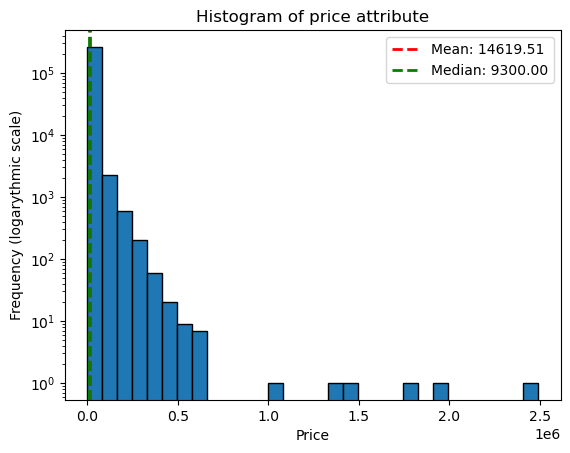

In [34]:
import numpy as np

data = car_data["price"]
plt.hist(data, bins=30, edgecolor='black')
mean_value = np.mean(data)
median_value = np.median(data)
plt.title("Histogram of price attribute")
plt.yscale("log")
plt.ylabel("Frequency (logarythmic scale)")
plt.xlabel('Price')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.legend()
plt.show()

### Model selection and prepararions

In our project we are going to use and compare KNN regression and random forest regression.

Before we go any further, we should convert all of the non-numerical attributes to numerical values.

In [35]:
categorical_columns = car_data.select_dtypes(include=['object']).columns

unique_category_counts = {}

for column in categorical_columns:
    unique_categories = car_data[column].nunique()
    unique_category_counts[column] = unique_categories

for column, count in unique_category_counts.items():
    print(f"Column '{column}' has {count} unique categories.")

Column 'maker' has 67 unique categories.
Column 'genmodel' has 773 unique categories.
Column 'color' has 22 unique categories.
Column 'bodytype' has 18 unique categories.
Column 'gearbox' has 3 unique categories.
Column 'fuel_type' has 13 unique categories.


Since the **gearbox** attribute only has 3 categories, we can use one-hot encoding for that one. However, the other columns have a large number of unique categories, hence one-hot encoding will not be a great choice for them because it would make the future computations very inefficient and also it would expose us to the curse of dimentionality. Another approach is to use label encoding, however this one will introduce an artificial ordering which is not beneficial. A good idea would be to use target encoding, where for each category the mean of the price for the samples with this category in the training set would be used. However, we need to make sure that only the price values from the training set are used to avoid data leakage from the test sets.

In [36]:
from sklearn.impute import KNNImputer

def one_hot_encode(df, columns_to_encode):
    return pd.get_dummies(df, columns=columns_to_encode)

def standardize_data(df, scaler):
    df_standardized = scaler.transform(df)
    return df_standardized
    

Above we have defined a number of utility functions. The *mean_target_encoding* function combined with *taret_encode* are going to be used to encode the categorical attributes using the mean encoding method. The *one_hot_encode* is obviously used for one-hot encoding. <br>

Before we proceed any further, we should extract a test set from our dataset that will be used for comparing the two regressors after they are trained and tuned.

In [37]:
from sklearn.model_selection import train_test_split

intermediate_set, comparison_test_set = train_test_split(car_data, test_size=0.2, random_state=42)
car_data_train_set, car_data_validation_set = train_test_split(intermediate_set, test_size=0.25, random_state=42)

Here we will quickly perform a test and a visualisation of the target encoding method.

### Tuning hyperparameters

Now it is time to split our dataset into train and test sets for cross-validation and tune the hyperparameters of our models. Here we only use 3 folds in CV because of limited computing resources. (This section has been turned off because it takes an extensive amount of time for someone that would just want to run the code to play with the final models. If you would like to run this part yourself, change the cell type from raw to markdown.)

Based on the result of the hyperparameter tuning above we will set the number of neighbors to 6.<br><br>

Now we shall do the same for the random forest regression model.

Based on the above, we can see that the smallest error is observed for max_depth = 50 and n_estimators = 50. However, we are going to choose the combination of max_depth = 10, n_estimators = 50 due to Ockham's razor principle hoping that this setting will generalize to unseen data better instead of overfitting the training set.

### Training and comparing the models

Finally, we are going to train both the regressors and then evaluate and compare them using various metrics and visualisation methods.

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

train_set = car_data_train_set.copy()
test_set = comparison_test_set.copy()

columns_to_encode = ["maker", "genmodel", "color", "bodytype", "fuel_type"]

target_encoder = TargetEncoder(target_type="continuous")

train_target_var = car_data_train_set.pop("price")

if train_target_var.isnull().any():
    raise ValueError("NaN values found in the target variable.")

train_target_var = train_target_var.values

train_set = one_hot_encode(car_data_train_set, ["gearbox"])
target_encoder.fit(train_set, train_target_var)
train_set = target_encoder.transform(train_set)

test_target_var = test_set.pop("price")

if test_target_var.isnull().any():
    raise ValueError("NaN values found in the target variable of the validation set.")

test_target_var = test_target_var.values

test_set = one_hot_encode(test_set, ["gearbox"])
test_set = target_encoder.transform(test_set)

scaler = StandardScaler()
scaler.fit(train_set)
train_set = scaler.transform(train_set)
test_set = scaler.transform(test_set)

knn_regressor = KNeighborsRegressor(n_neighbors=6)
random_forest = RandomForestRegressor(max_depth=10, n_estimators=50)

knn_regressor.fit(train_set, train_target_var)
random_forest.fit(train_set, train_target_var)

random_forest_pred = random_forest.predict(test_set)
knn_pred = knn_regressor.predict(test_set)

knn_mse = mean_squared_error(test_target_var, knn_pred)
random_forest_mse = mean_squared_error(test_target_var, random_forest_pred)

print(f"Error for knn : {knn_mse}")
print(f"Error for random forest: {random_forest_mse}")

Error for knn : 115040656.44473892
Error for random forest: 41082706.440559655


In [39]:
from sklearn.metrics import mean_absolute_error

random_forest_pred = random_forest.predict(test_set)
random_forest_mse = mean_squared_error(test_target_var, random_forest_pred)
print(f"Error for random forest: {random_forest_mse}")
mae_rn = mean_absolute_error(y_true=test_target_var, y_pred=random_forest_pred)
print(f"Error for random forest (MAE): {mean_absolute_error(y_true=test_target_var, y_pred=random_forest_pred)}")
print(f"Error for knn (MAE): {mean_absolute_error(y_true=test_target_var, y_pred=knn_pred)}")

Error for random forest: 41082706.440559655
Error for random forest (MAE): 2528.160493026044
Error for knn (MAE): 2805.4381262431043


In [55]:
mean_relative_rf = np.mean(abs(test_target_var - random_forest_pred)/test_target_var)
mean_relative_knn = np.mean(abs(test_target_var - knn_pred)/test_target_var)

print(mean_relative_rf)
print(mean_relative_knn)

0.28474305155232305
0.29553369890816894


Here we are performing significance testing to see if the difference in performances of both models is statistically meaningful.

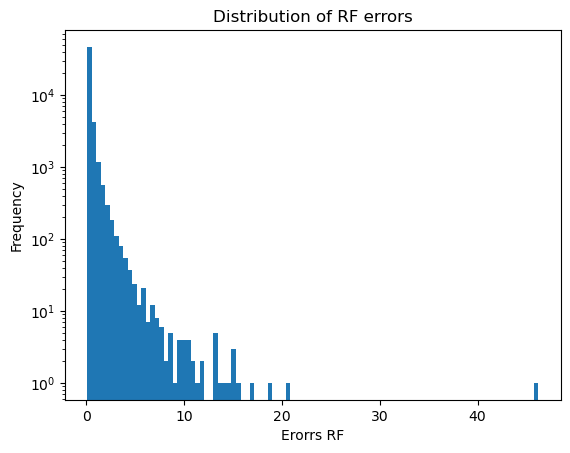

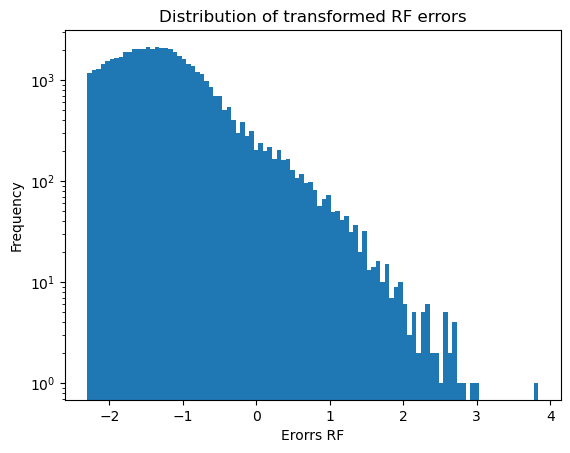

Reject null hypothesis: There's a significant difference in errors.
p-value: 1.065482905917102e-05


In [56]:
from scipy.stats import ttest_rel

errors_knn = abs(test_target_var - knn_pred)/test_target_var + 0.1
errors_rf = abs(test_target_var - random_forest_pred)/test_target_var + 0.1

errors_knn_transformed = np.log(errors_knn)
errors_rf_transformed = np.log(errors_rf)

plt.hist(errors_rf, bins=100)
plt.xlabel("Erorrs RF")
plt.ylabel("Frequency")
plt.title("Distribution of RF errors")
plt.yscale("log")
plt.show()

plt.hist(errors_rf_transformed, bins=100)
plt.xlabel("Erorrs RF")
plt.ylabel("Frequency")
plt.title("Distribution of transformed RF errors")
plt.yscale("log")
plt.show()

t_statistic, p_value = ttest_rel(errors_knn, errors_rf, alternative="greater")

alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
    
print(f"p-value: {p_value}")

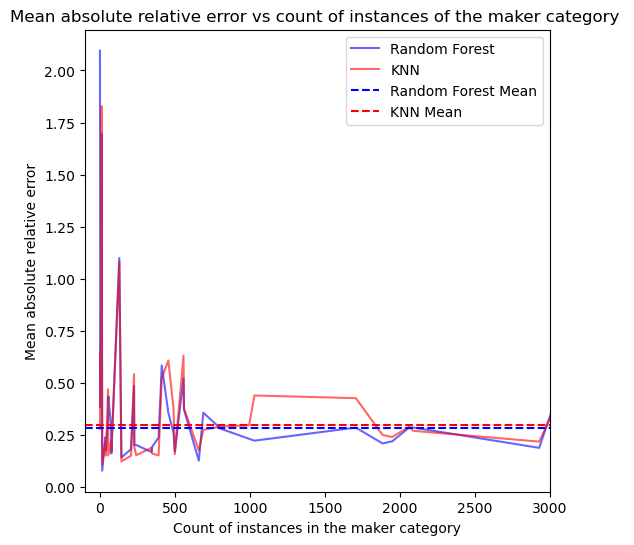

In [54]:
test_set_copy = comparison_test_set.copy()
train_set_copy = car_data_train_set.copy()

test_set_copy["knn_price"] = knn_pred
test_set_copy["rf_price"] = random_forest_pred


sorted_test_set_copy = test_set_copy.sort_values(by="maker")
sorted_train_set_copy = train_set_copy.sort_values(by="maker")
sorted_test_set_copy["knn_absolute_error"] = abs(sorted_test_set_copy["price"] - sorted_test_set_copy["knn_price"])/sorted_test_set_copy["price"]
sorted_test_set_copy["rf_absolute_error"] = abs(sorted_test_set_copy["price"] - sorted_test_set_copy["rf_price"])/sorted_test_set_copy["price"]
model_mean_error_knn = sorted_test_set_copy.groupby('maker')['knn_absolute_error'].mean().to_dict()
model_mean_error_rf = sorted_test_set_copy.groupby('maker')['rf_absolute_error'].mean().to_dict()

model_count = sorted_train_set_copy.groupby('maker')["maker"].count().to_dict()
sorted_model_count = dict(sorted(model_count.items(), key=lambda item: int(item[1])))

def consecutive_counts(sorted_list):
    result = []
    current_count = 1
    for i in range(1, len(sorted_list)):
        if sorted_list[i] == sorted_list[i-1]:
            current_count += 1
        else:
            result.append(current_count)
            current_count = 1
    result.append(current_count)
    return result

models = list(sorted_model_count.keys())
rf_mean_errors = []
knn_mean_errors = []

for count in consecutive_counts(list(sorted_model_count.values())):
    current_knn_errors = []
    current_rf_errors = []
    for _ in range(0, count):
        current_model = models.pop(0)
        
        current_knn_error = model_mean_error_knn.get(current_model)
        current_rf_error = model_mean_error_rf.get(current_model)
        
        if current_knn_error and current_rf_error:
            current_knn_errors.append(current_knn_error)
            current_rf_errors.append(current_rf_error)
    
    rf_mean_errors.append(np.mean(current_rf_errors))
    knn_mean_errors.append(np.mean(current_knn_errors))

counts = []

for count in sorted_model_count.values():
    if count not in counts:
        counts.append(count)
        
plt.figure(figsize=(6, 6))
plt.plot(counts, rf_mean_errors, color="blue", alpha=0.6, label="Random Forest")
plt.plot(counts, knn_mean_errors, color="red", alpha=0.6, label="KNN")
plt.axhline(y=mean_relative_rf, color='b', linestyle='--', label="Random Forest Mean")
plt.axhline(y=mean_relative_knn, color='r', linestyle='--', label="KNN Mean")
plt.xlim(-100, 3000)
plt.title("Mean absolute relative error vs count of instances of the maker category ")
plt.xlabel("Count of instances in the maker category")
plt.ylabel("Mean absolute relative error")
plt.legend()
plt.show()

Here a mean naive baseline model has been created to see how does it compare to our two models.

In [57]:
mean_regressor_pred = [np.mean(train_target_var) for _ in test_target_var]

53294

In [59]:
mean_squared_mean = mean_squared_error(test_target_var, mean_regressor_pred)
mae_mean = mean_absolute_error(y_true=test_target_var, y_pred=mean_regressor_pred)
mean_relative_mean = np.mean(abs(test_target_var - mean_regressor_pred)/test_target_var)

print(mean_squared_mean)
print(mae_mean)
print(mean_relative_mean)

483934946.0892285
10840.439838618808
2.118914232127311
